<a href="https://colab.research.google.com/github/amalta1QS/config-server-repo/blob/master/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
data = pd.read_csv('Churn_Modelling.csv')
X = data.iloc[:, 3:-1]
y = data.iloc[:, -1]

In [4]:
X = X.iloc[:, 3:]

In [5]:
labelencoder_X_2 = LabelEncoder()
X[X.columns[2]] = labelencoder_X_2.fit_transform(X[X.columns[2]])
columntransformer_X_1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(columntransformer_X_1.fit_transform(X))


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
model = keras.Sequential([
   layers.Dense(12, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'),
    layers.Dense(6, kernel_initializer='uniform', activation='relu'),
    layers.Dense(6, kernel_initializer='uniform', activation='relu'),
    layers.Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                216       
                                                                 
 dense_5 (Dense)             (None, 6)                 78        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 343 (1.34 KB)
Trainable params: 343 (1.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [15]:
model_history1 = model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.7944
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7945
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7945
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7945
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7945
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7945
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5082 - accura

In [16]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:\n", cm)

63/63 [==============================] - 0s 2ms/step
Matrice de confusion:
 [[1566   41]
 [ 261  132]]


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_history2 = model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.3401 - accuracy: 0.8615
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8614
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8630
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8627
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8626
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8636
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8611
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8625
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8640
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3380 - accura

In [19]:
import matplotlib.pyplot as plt

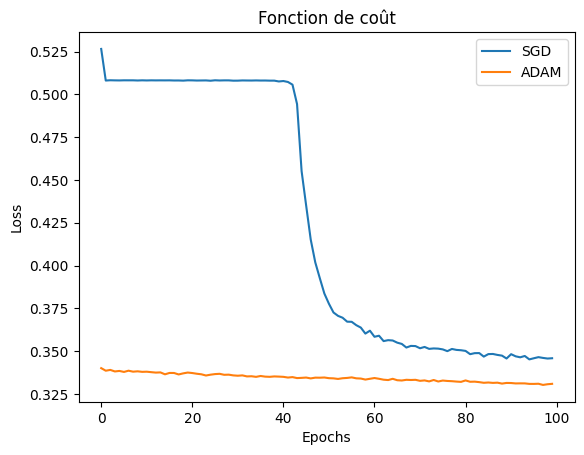

In [20]:
plt.plot(model_history1.history['loss'], label='SGD')
plt.plot(model_history2.history['loss'], label='ADAM')
plt.title('Fonction de coût')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

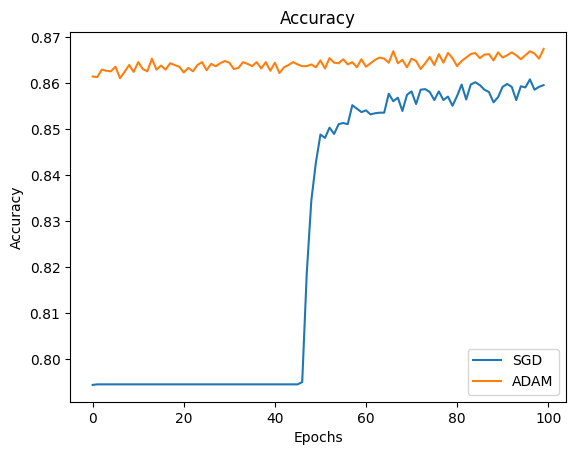

In [21]:
plt.plot(model_history1.history['accuracy'], label='SGD')
plt.plot(model_history2.history['accuracy'], label='ADAM')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()